<center>
    <h1><b>Employee Retention Rate Prediction: Binary Logistic Regression</b></h1>
    ------------------------------------------------
</center>

**Problems to solve**
 - Do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they would leave the company or continue to work)
 - Plot bar charts showing impact of employee salaries on retention
 - Plot bar charts showing correlation between department and employee retention
 - Build logistic regression model using variables that were narrowed down in step 1
 - Measure the accuracy of the model

----

In [1]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Loding the dataset s dataframe
df = pd.read_csv(r'D:\AI Engineering\Python\My_Projects\Datasets/HR_comma_sep.csv')

### Exploratory Data Analysis

In [6]:
# Viewing the top 5 ros of the dataframe
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
# Examining the general information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
# Finding out if there is any null rows
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [9]:
# Checking the unique values in left column
df['left'].unique()

array([1, 0], dtype=int64)

In [10]:
df.columns = df.columns.str.lower()

In [11]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [12]:
# Checking the unique values in department column
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [13]:
# Checking the unique values in salary column
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

**Visualization of salary impact on retention**

In [14]:
# Numbers of employees that stayed or left based on salary
grouped_df = df.groupby(['salary', 'left']).size().reset_index(name='number_of_employees')
grouped_df

,salary,left,number_of_employees
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129
5,medium,1,1317


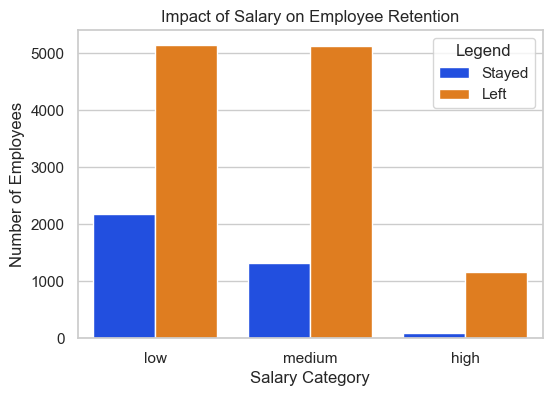

In [15]:
sb.set(style = 'whitegrid')

df['left'] = df['left'].astype(str)

plt.figure(figsize = (6, 4))
sb.countplot(x = 'salary', hue ='left', data = df, palette = 'bright')

plt.xlabel('Salary Category')
plt.ylabel('Number of Employees')
plt.title('Impact of Salary on Employee Retention')
plt.title('Impact of Salary on Employee Retention')
plt.legend(title ='Legend', loc = 'upper right', labels = ['Stayed', 'Left']);

In [16]:
# Numbers of employees that stayed or left based on department
grouped_df = df.groupby(['department', 'left']).size().reset_index(name='number_of_employees')
grouped_df

,department,left,number_of_employees
0,IT,0,954
1,IT,1,273
2,RandD,0,666
3,RandD,1,121
4,accounting,0,563
5,accounting,1,204
6,hr,0,524
7,hr,1,215
8,management,0,539
9,management,1,91


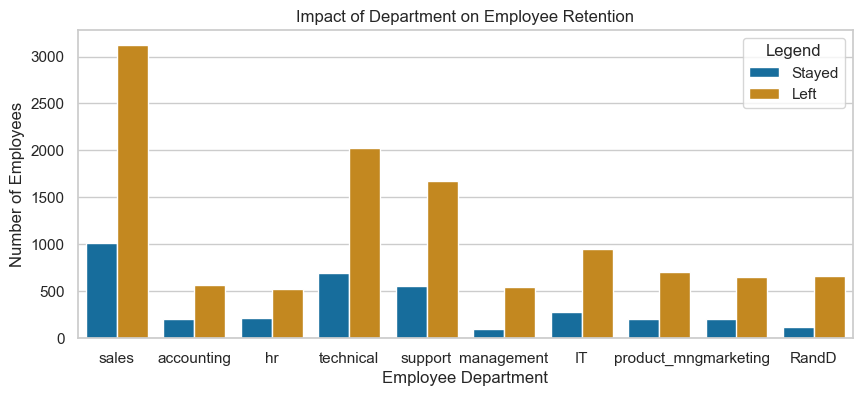

In [17]:
sb.set(style = 'whitegrid')

df['left'] = df['left'].astype(str)

plt.figure(figsize = (10, 4))
sb.countplot(x = 'department', hue ='left', data = df, palette = 'colorblind')  # Set1, colorblind, bright, Dark2, 

plt.xlabel("Employee Department")
plt.ylabel('Number of Employees')
plt.title('Relationship between Department and Employee Retention')
plt.title('Impact of Department on Employee Retention')
plt.legend(title ='Legend', loc = 'upper right', labels = ['Stayed', 'Left']);

#### Visualization of relationships between numeric columns using Pairwise and Heatmap

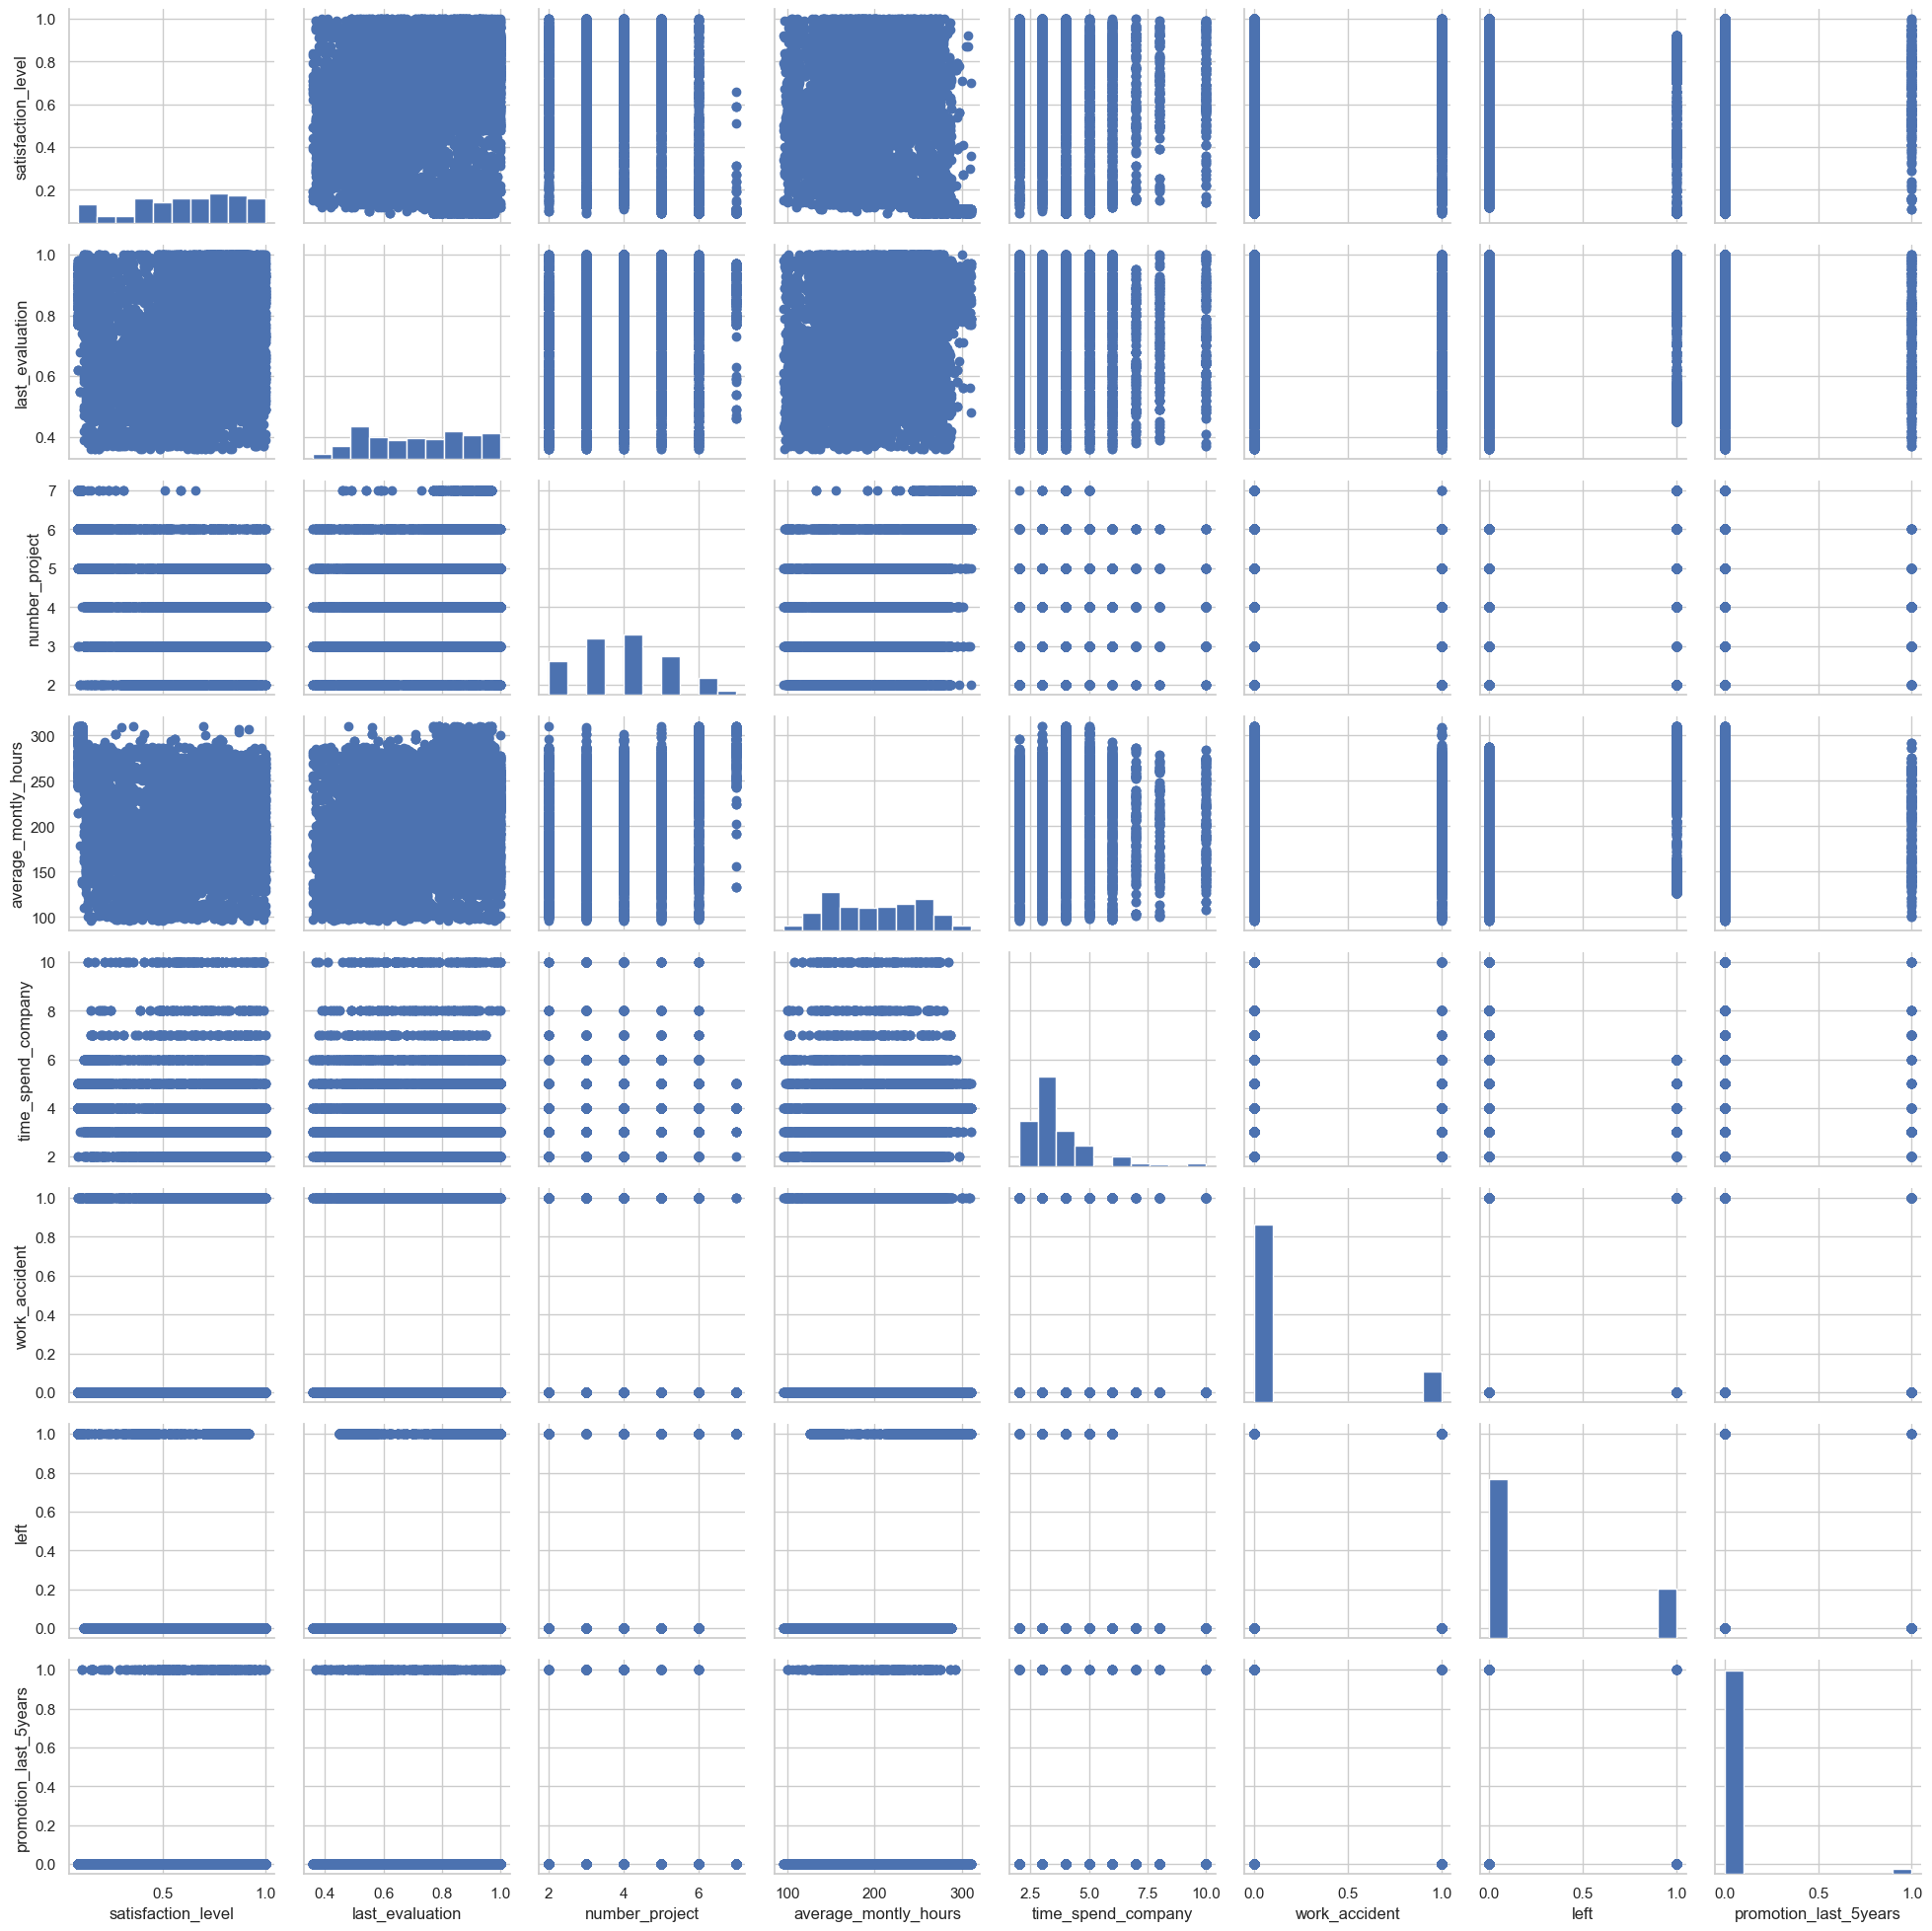

In [18]:
# covert left column to int datatype
df['left'] = df['left'].astype(int)

# list of columns with numeric values values
num_columns = [col for col in df.select_dtypes(exclude='object').columns]

pairwise = sb.PairGrid(data = df, vars = num_columns)
pairwise = pairwise.map_diag(plt.hist, bins = 10)
pairwise.map_offdiag(plt.scatter);

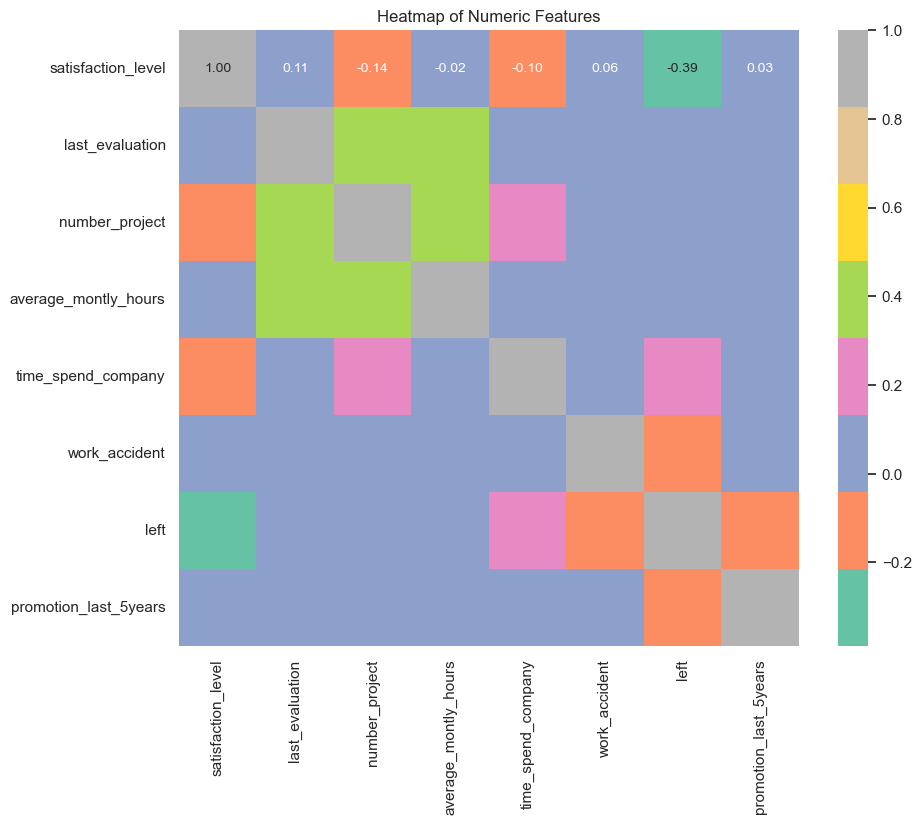

In [19]:
plt.figure(figsize=(10, 8))
heatmap = sb.heatmap(df[num_columns].corr(), annot=True, cmap='Set2', fmt=".2f", annot_kws={"size": 10})
plt.title('Heatmap of Numeric Features');

### Building Logistic Regression Model

In [20]:
# seprating independent variables from dependent variables
X = df.drop('left', axis = 1)
y = df['left']

**One Hot Encoder**

In [21]:
# importation of libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [22]:
# Transforming the features (independent variables)
col_transformer = ColumnTransformer(transformers = [('cat', OneHotEncoder(), ['department', 'salary'])],
                                   remainder = 'passthrough')  # Keep the remaining columns as they are

X_transformed = col_transformer.fit_transform(X)  # Transform the features

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.2, random_state = 10)

In [24]:
X_train

array([[0., 0., 0., ..., 3., 0., 0.],
       [0., 1., 0., ..., 6., 0., 0.],
       [0., 0., 0., ..., 4., 0., 0.],
       ...,
       [0., 1., 0., ..., 3., 1., 0.],
       [0., 0., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 4., 0., 0.]])

In [25]:
# Building model
model = LogisticRegression(max_iter = 500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [26]:
# model prediction
predict = model.predict(X_test)

**Model Evaluation**

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
# evaluation of model
accuracy = accuracy_score(y_test, predict)
accuracy

0.788

In [29]:
model.score(X_test, y_test)

0.788

In [30]:
# Confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, predict))

print('Classification Report:')
print(classification_report(y_test, predict))


Confusion Matrix:
[[2102  164]
 [ 472  262]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2266
           1       0.62      0.36      0.45       734

    accuracy                           0.79      3000
   macro avg       0.72      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000



### Saving the model

In [31]:
import pickle as pk

In [32]:
with open('employee_retention_model', 'wb') as file:
    pk.dump(model, file)